### Overview
For this dataset I explored employee satisfaction ratings to gauge the strenghths and weaknesses of the company though the employee's viewpoint. By exploring employee statisfaction by department it can reveal which teams are thriving or stuggling with workload or leadership. Additionally, employee satisfaction was explored by manager to pinpoint management styles or behaviors that affect employee motivation. Moveover because low satisfaction ratings can lead to turnover, I compared employee satisfaction scores between those whom are still employed versus those who were terminated. Ultimately for the this analysis for the "Best Workplace in Atlanta" board we want to ensure company satisfaction is balanced across the organization and not siloed to a few good departments.

- Data Operations and Tools for Visualization 
    - Employee Satisfaction by Department 
        - `groupby()`, aggregation functions `sum`, `max`, `mean`, `count` and bar graph
    -Employee Satisfation by Manager in each Department 
        - `groupby()`, aggregation functions `sum`, `max`, `mean`, `count` and bar graph
    -Employee Satisfaction Rating for Employed and Termination Reasons
        - 


### Part 1: Load & Import Data 

In [ ]:
Overview
Which departments or managers have the highest employee satisfaction, and is this satisfaction linked to employees' reasons for leaving?

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
hr_data = pd.read_csv("../data/HRDataset.csv")


### Part 2: EDA

In [ ]:
## view first 5 rows of your data
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
# Select only relevant columns
satisfaction = hr_data[["Department", "ManagerName", "EmpSatisfaction", "TermReason", "Termd"]]
satisfaction

,Department,ManagerName,EmpSatisfaction,TermReason,Termd
0,Production,Michael Albert,5,N/A-StillEmployed,0
1,IT/IS,Simon Roup,3,career change,1
2,Production,Kissy Sullivan,3,hours,1
3,Production,Elijiah Gray,5,N/A-StillEmployed,0
4,Production,Webster Butler,4,return to school,1
...,...,...,...,...,...
306,Production,Kissy Sullivan,4,N/A-StillEmployed,0
307,Production,Brannon Miller,2,Another position,1
308,IT/IS,Janet King,5,N/A-StillEmployed,0
309,IT/IS,Simon Roup,3,N/A-StillEmployed,0


In [ ]:
#Identify null values
satisfaction.isnull().sum()

Department         0
ManagerName        0
EmpSatisfaction    0
TermReason         0
Termd              0
dtype: int64

### Part 3: Analytical Question

Which departments or managers have the highest employee satisfaction, and is employee statisfaction balanced across the organization?

To answer the analytical question, the following columns were used from the orginal HDDataset.csv
`EmpSatisfaction` - The rating of company satifaction by each employee
`Department` - the department of each employee
`Manager Name` - Name of the manager for each employee
`ManagerID` - Manager unique ID number
`Term-Reason` - Reason the employee left the company 
`Termd` - indicates if the employee is still employed or terminated

In [ ]:
#Group employee satisfaction scores for each department and calculate multiple aggregations
satisfaction.groupby('Department').agg({'EmpSatisfaction' : ['mean', 'max', 'count', 'sum']}).round(2)

EmpSatisfaction               
                                mean max count  sum
Department                                         
Admin Offices                   3.56   5     9   32
Executive Office                3.00   3     1    3
IT/IS                           3.96   5    50  198
Production                      3.86   5   209  807
Sales                           4.03   5    31  125
Software Engineering            4.09   5    11   45

In [ ]:
#Group employee satisfaction by manager in each department and calculate multiple aggregations
satisfaction.groupby(['Department','ManagerName']).agg({'EmpSatisfaction' : ['mean', 'max', 'count', 'sum']}).round(2)

EmpSatisfaction              
                                                   mean max count sum
Department           ManagerName                                     
Admin Offices        Board of Directors            3.00   3     1   3
                     Brandon R. LeBlanc            3.57   5     7  25
                     Janet King                    4.00   4     1   4
Executive Office     Board of Directors            3.00   3     1   3
IT/IS                Brian Champaigne              4.00   5     8  32
                     Eric Dougall                  3.50   4     4  14
                     Janet King                    5.00   5     1   5
                     Jennifer Zamora               4.50   5     6  27
                     Peter Monroe                  3.93   5    14  55
                     Simon Roup                    3.82   5    17  65
Production           Amy Dunn                      3.81   5    21  80
                     Brannon Miller                3.41   5    22  75
                     David Stanley                 3.95   5    21  83
                     Elijiah Gray                  3.95   5    22  87
                     Janet King                    3.47   5    15  52
                     Kelley Spirea                 3.82   5    22  84
                     Ketsia Liebig                 4.10   5    21  86
                     Kissy Sullivan                3.91   5    22  86
                     Michael Albert                4.05   5    22  89
                     Webster Butler                4.05   5    21  85
Sales                Debra Houlihan                4.33   5     3  13
                     Janet King                    4.00   4     1   4
                     John Smith                    3.93   5    14  55
                     Lynn Daneault                 4.08   5    13  53
Software Engineering Alex Sweetwater               4.22   5     9  38
                     Janet King                    4.00   4     1   4
                     Jennifer Zamora               3.00   3     1   3

In [ ]:
#Group by Department and calculate the mean of Employee Satisfaction
depart_avg = satisfaction.groupby('Department').agg({'EmpSatisfaction' : ['mean']})
depart_avg.round(2)

,EmpSatisfaction
,mean
Department,
Admin Offices,3.56
Executive Office,3.00
IT/IS,3.96
Production,3.86
Sales,4.03
Software Engineering,4.09


In [ ]:
#Modify the column name for the depart_avg variable
depart_avg.columns = ["EmpSatifaction_mean"]

C:\Users\since\AppData\Local\Temp\ipykernel_22124\3122374448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= depart_avg, x= "Department", y= "EmpSatifaction_mean", palette="Paired")


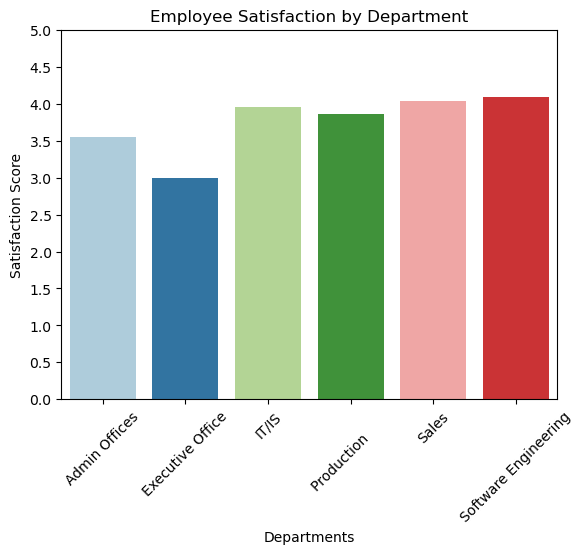

In [96]:
#Plot visualization for Employee Satisfaction by manager for satifaction score
sns.barplot(data= depart_avg, x= "Department", y= "EmpSatifaction_mean", palette="Paired")
plt.xlabel('Departments')
plt.ylabel('Satisfaction Score')
plt.title('Employee Satisfaction by Department')
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.xticks(rotation=45)
plt.show()

In [136]:
#Group by Department then manager name and calculate the mean of Employee Satisfaction
manager_avg = satisfaction.groupby(['Department','ManagerName']).agg({'EmpSatisfaction' : ['mean', 'count']}).round(2)
manager_avg = manager_avg.sort_values(by=['Department', ('EmpSatisfaction', 'mean')], ascending=[True, False])
manager_avg

EmpSatisfaction      
                                                   mean count
Department           ManagerName                             
Admin Offices        Janet King                    4.00     1
                     Brandon R. LeBlanc            3.57     7
                     Board of Directors            3.00     1
Executive Office     Board of Directors            3.00     1
IT/IS                Janet King                    5.00     1
                     Jennifer Zamora               4.50     6
                     Brian Champaigne              4.00     8
                     Peter Monroe                  3.93    14
                     Simon Roup                    3.82    17
                     Eric Dougall                  3.50     4
Production           Ketsia Liebig                 4.10    21
                     Michael Albert                4.05    22
                     Webster Butler                4.05    21
                     David Stanley                 3.95    21
                     Elijiah Gray                  3.95    22
                     Kissy Sullivan                3.91    22
                     Kelley Spirea                 3.82    22
                     Amy Dunn                      3.81    21
                     Janet King                    3.47    15
                     Brannon Miller                3.41    22
Sales                Debra Houlihan                4.33     3
                     Lynn Daneault                 4.08    13
                     Janet King                    4.00     1
                     John Smith                    3.93    14
Software Engineering Alex Sweetwater               4.22     9
                     Janet King                    4.00     1
                     Jennifer Zamora               3.00     1

In [ ]:
#Modify the column name for the manager_avg variable
manager_avg.columns = ["EmploySatisfaction_mean"]

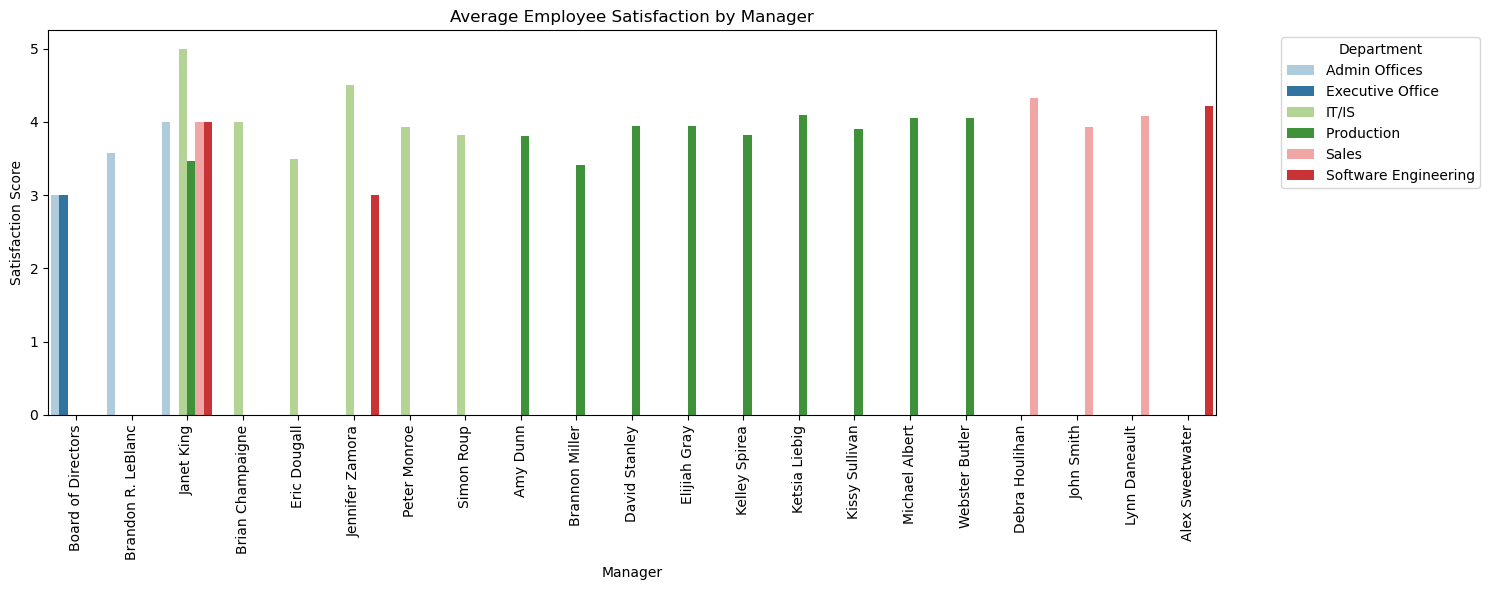

In [95]:
#Plot visualization for Employee Satisfaction by manager for satifaction score
plt.figure(figsize=(15, 6))
sns.barplot(data= manager_avg, x= "ManagerName", y= "EmploySatisfaction_mean", hue="Department", width= 0.9, palette="Paired")
plt.title('Average Employee Satisfaction by Manager')
plt.xlabel('Manager')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=90)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
#Group by Termination Reason and Employee Satisfaction and count the number for each Employee Satisfaction score
term_satisfaction = satisfaction.groupby(['TermReason', 'EmpSatisfaction']).size().reset_index(name='Count')
term_satisfaction

,TermReason,EmpSatisfaction,Count
0,Another position,2,1
1,Another position,3,4
2,Another position,4,7
3,Another position,5,8
4,Fatal attraction,5,1
5,Learned that he is a gangster,5,1
6,N/A-StillEmployed,1,2
7,N/A-StillEmployed,2,5
8,N/A-StillEmployed,3,75
9,N/A-StillEmployed,4,56


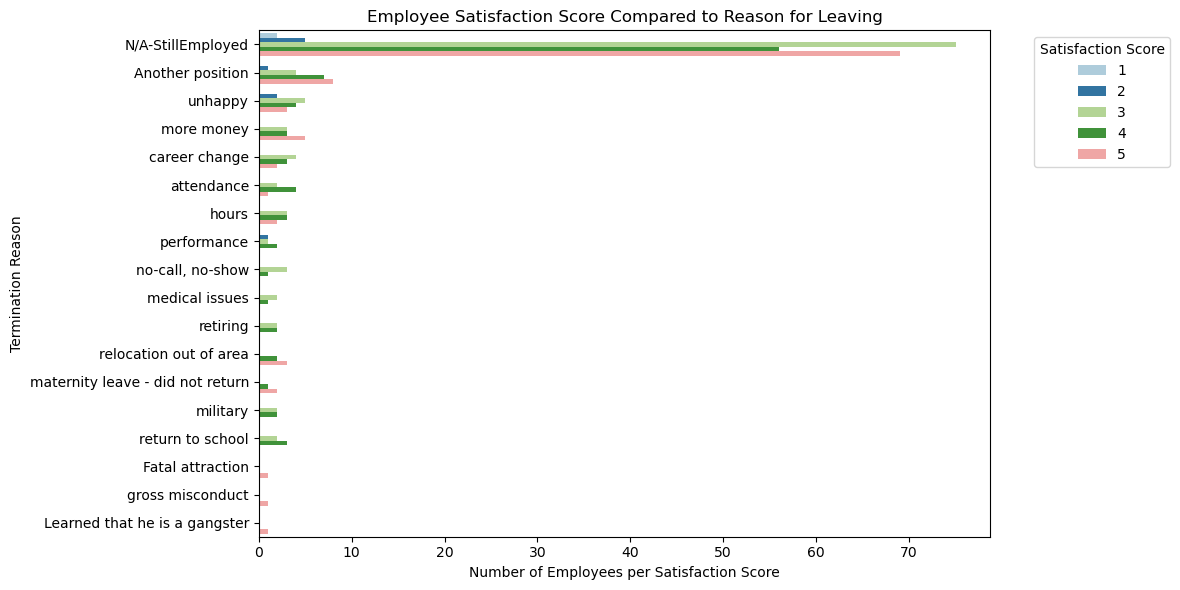

In [129]:
#Plot visualization for each Employee Satisfaction rating by reason for leaving 
plt.figure(figsize=(12, 6))
sns.countplot(data=satisfaction, y='TermReason', hue='EmpSatisfaction', order=term_satisfaction['TermReason'].value_counts().index , palette="Paired")
plt.title('Employee Satisfaction Score Compared to Reason for Leaving')
plt.xlabel('Number of Employees per Satisfaction Score')
plt.ylabel('Termination Reason')
plt.legend(title= 'Satisfaction Score', bbox_to_anchor= (1.05,1), loc='upper left')
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [137]:
term_avg = satisfaction.groupby(['TermReason']).agg({'EmpSatisfaction' : ['mean']}).round(2).sort_values(by= ("EmpSatisfaction", "mean"), ascending=False)
term_avg

,EmpSatisfaction
,mean
TermReason,
Fatal attraction,5.00
Learned that he is a gangster,5.00
gross misconduct,5.00
maternity leave - did not return,4.67
relocation out of area,4.60
more money,4.18
Another position,4.10
N/A-StillEmployed,3.89


C:\Users\since\AppData\Local\Temp\ipykernel_22124\669079896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=term_satisfaction, x='TermReason', y='EmpSatisfaction', palette="RdBu")


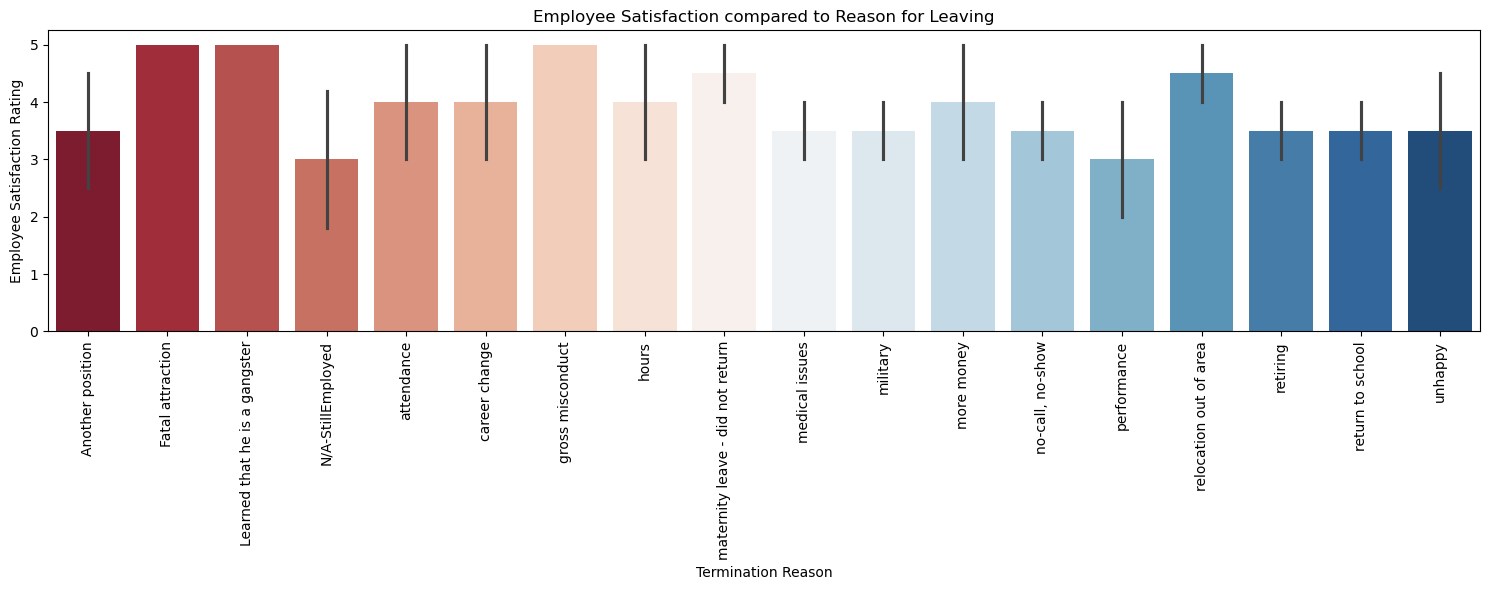

In [98]:
#Plot visualization for Employee Satisfaction average by termination reason 
plt.figure(figsize=(15, 6))
sns.barplot(data=term_satisfaction, x='TermReason', y='EmpSatisfaction', palette="RdBu")
plt.xlabel('Termination Reason')
plt.ylabel('Satisfaction Score')
plt.title('Employee Satisfaction Average compared to Reason for Leaving')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Employee Satisfaction Group by Employed and Terminated Employees 
grouped_satisfaction = satisfaction.groupby(['Termd'])[['EmpSatisfaction']].mean().reset_index()
grouped_satisfaction.round(2)

,Termd,EmpSatisfaction
0,0,3.89
1,1,3.88


In [132]:
# Overall company employee satisfaction in the company 
overall_satisfaction = satisfaction.EmpSatisfaction.mean()
overall_satisfaction.round(2)

np.float64(3.89)

### Part 4: Conclusion

Bango’s overall company-wide employee satisfaction score was 3.89 out of 5. The highest satisfaction scores were observed in the Software Engineering and Sales departments, with averages of 4.09 and 4.03, respectively. The lowest score was reported in the Executive Office at 3.0; however, this department had only one response, which limits the reliability of this observation.

When comparing satisfaction scores by manager, Janet King stood out for managing at least one employee in each department. She achieved the highest satisfaction scores in 2 out of 5 departments and received a perfect score of 5.0 in the Executive Office. However, it's important to note that she managed only one employee per department, limiting the comparability of her scores to those of other managers with larger teams. The lowest average satisfaction scores were attributed to the Board of Directors and Jennifer Zamora in the Software Engineering department, both with a score of 3.0.

Finally, current employees (N/A–Still Employed) and terminated employees had similar satisfaction scores of 3.88 and 3.89, respectively. This suggests that employee satisfaction may not be a strong predictor of turnover at Bango.


### Part 5: Next Steps


